In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm

diabetes = datasets.load_diabetes()
diaB=pd.DataFrame(data=diabetes.data , columns = diabetes.feature_names)
diaB["Target"]=diabetes.target
diaB2=diaB.copy(deep=True)
print(diaB2)

442


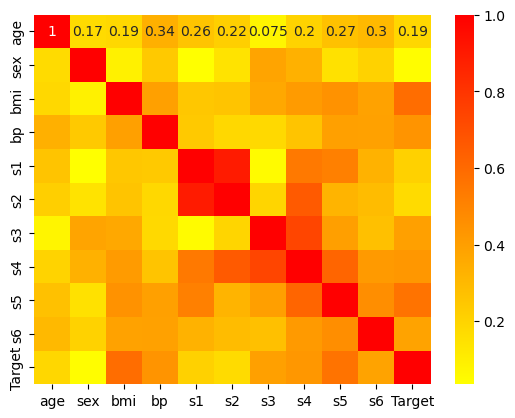

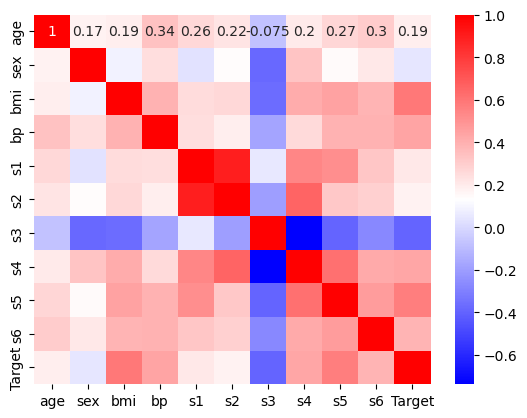

In [21]:
corr_matrix=diaB.corr()#به ماتریکس همبستگی تبدیل میکند 
sns.heatmap(abs(corr_matrix),annot=True,cmap=plt.cm.autumn_r)#bs =مقدار مطلق یک عدد را محاسبه می‌کند، به این معنا که اگر عدد مورد نظر مثبت باشد، خود آن عدد را برمی‌گرداند و اگر منفی باشد، مقدار منفی آن را به مثبت تبدیل می‌کند.
plt.show()
sns.heatmap(corr_matrix,annot=True,cmap=plt.cm.bwr)

plt.show()

In [73]:
corr_target = abs(corr_matrix['Target'])
rel_vars = corr_target[corr_target > 0.4]
rel_vars.sort_values(ascending=False,inplace=True)
print(rel_vars)
#this result have the hight corelation with the target variable

Target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
Name: Target, dtype: float64


In [75]:
X=diaB[['bmi','s5','bp','s4']]
X.insert(0,'count',1)
Y=diaB['Target']
reg=sm.OLS(Y,X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           5.41e-61
Time:                        12:40:10   Log-Likelihood:                -2402.1
No. Observations:                 442   AIC:                             4814.
Df Residuals:                     437   BIC:                             4835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
count        152.1335      2.653     57.344      0.0

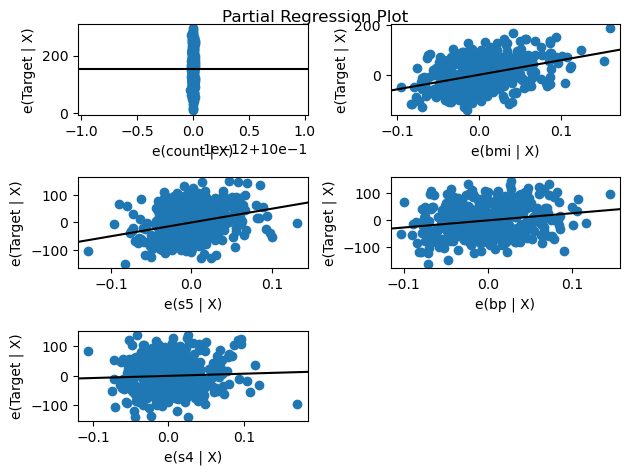

In [81]:
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)
fig=sm.graphics.plot_partregress_grid(reg)
plt.show()

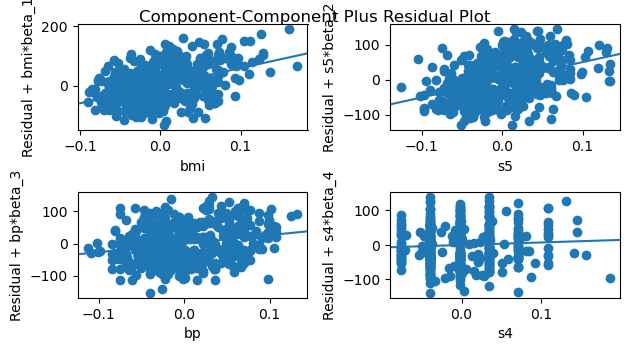

In [83]:
fig=sm.graphics.plot_ccpr_grid(reg)
plt.show()

In [95]:

diaB["Y_pred"]=reg.predict()
diaB["Residual"]=diaB["Target"] - diaB["Y_pred"] 
std_res=diaB["Residual"].std() 
diaB["standardized_red"]=diaB["Residual"]/std_res
print(diaB)



          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target      Y_pred   Residual  \
0   -0.

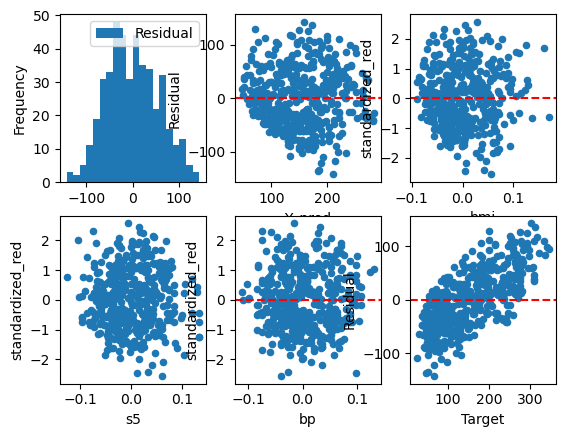

In [107]:
fig, ((hist_1,res_Y,res_bmi),(res_Y3,sres_X4,sre_X5))=plt.subplots(2,3)

diaB.plot(y='Residual', kind='hist', bins=20, ax=hist_1)

diaB.plot('Y_pred', 'Residual', kind='scatter',ax=res_Y)
res_Y.axhline(y=0.0, c='red', linestyle='dashed')

diaB.plot('bmi', 'standardized_red', kind='scatter',ax=res_bmi)
res_bmi.axhline(y=0.0, c='red', linestyle='dashed')

diaB.plot('s5', 'standardized_red', kind='scatter',ax=res_Y3)
res_Y.axhline(y=0.0, c='red', linestyle='dashed')

diaB.plot('bp', 'standardized_red', kind='scatter',ax=sres_X4)
sres_X4.axhline(y=0.0, c='red', linestyle='dashed')

diaB.plot('Target', 'Residual', kind='scatter',ax=sre_X5)
sre_X5.axhline(y=0.0, c='red', linestyle='dashed')

plt.show()